In [1]:
import pandas as pd
import numpy as np

In [6]:
url = 'https://raw.githubusercontent.com/killicy/MachineLearningData/master/ratings_small.csv'
df = pd.read_csv(url, error_bad_lines=False)
print(df)

        userId  movieId  rating   timestamp
0            1       31     2.5  1260759144
1            1     1029     3.0  1260759179
2            1     1061     3.0  1260759182
3            1     1129     2.0  1260759185
4            1     1172     4.0  1260759205
...        ...      ...     ...         ...
99999      671     6268     2.5  1065579370
100000     671     6269     4.0  1065149201
100001     671     6365     4.0  1070940363
100002     671     6385     2.5  1070979663
100003     671     6565     3.5  1074784724

[100004 rows x 4 columns]


In [2]:
pip install scikit-surprise

In [8]:
from surprise import Reader, Dataset, SVD, KNNBasic,  KNNWithMeans
from surprise.model_selection.validation import cross_validate
reader = Reader()
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)
# when biased = false, same as PMF
svd = SVD(biased = False)
knnb = KNNBasic(user_based = True)
knnm = KNNWithMeans(user_based = False)

In [9]:
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0038  1.0072  1.0071  1.0097  1.0058  1.0067  0.0019  
MAE (testset)     0.7735  0.7767  0.7762  0.7801  0.7768  0.7767  0.0021  
Fit time          5.12    5.09    5.07    5.04    5.10    5.08    0.03    
Test time         0.26    0.17    0.17    0.25    0.27    0.22    0.04    


{'fit_time': (5.12014365196228,
  5.0921852588653564,
  5.068666219711304,
  5.04004693031311,
  5.096326112747192),
 'test_mae': array([0.77350571, 0.7767312 , 0.77619354, 0.78006033, 0.77683312]),
 'test_rmse': array([1.00378304, 1.00721809, 1.00711742, 1.00965773, 1.00578069]),
 'test_time': (0.25832319259643555,
  0.16692709922790527,
  0.17210721969604492,
  0.24536967277526855,
  0.2698404788970947)}

In [10]:
cross_validate(knnb, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9709  0.9547  0.9596  0.9745  0.9731  0.9666  0.0079  
MAE (testset)     0.7458  0.7363  0.7375  0.7499  0.7481  0.7435  0.0056  
Fit time          0.17    0.18    0.17    0.16    0.18    0.17    0.01    
Test time         2.24    2.23    2.25    2.31    2.39    2.28    0.06    


{'fit_time': (0.16581082344055176,
  0.17983126640319824,
  0.17293787002563477,
  0.1620190143585205,
  0.18013453483581543),
 'test_mae': array([0.74575173, 0.73625632, 0.73749433, 0.74993481, 0.74805647]),
 'test_rmse': array([0.97086047, 0.95472958, 0.9596006 , 0.97446493, 0.97311558]),
 'test_time': (2.235577344894409,
  2.2323215007781982,
  2.246978521347046,
  2.307610034942627,
  2.3894834518432617)}

In [11]:
cross_validate(knnm, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9129  0.9257  0.9177  0.9234  0.9145  0.9188  0.0049  
MAE (testset)     0.7018  0.7067  0.7008  0.7062  0.7019  0.7035  0.0025  
Fit time          0.18    0.22    0.22    0.21    0.22    0.21    0.02    
Test time         2.51    2.56    2.55    2.41    2.46    2.50    0.05    


{'fit_time': (0.18109798431396484,
  0.21970796585083008,
  0.22171854972839355,
  0.21145391464233398,
  0.22108888626098633),
 'test_mae': array([0.70176958, 0.7066907 , 0.70076507, 0.706215  , 0.70191655]),
 'test_rmse': array([0.91294229, 0.92565798, 0.91768805, 0.92335911, 0.91454854]),
 'test_time': (2.513503313064575,
  2.557600975036621,
  2.5477523803710938,
  2.412091016769409,
  2.46118426322937)}

In [14]:
knnb_cos = KNNBasic(name= 'cosine', user_based = True)
knnm_cos = KNNWithMeans(name= 'cosine', user_based = False)

In [15]:
cross_validate(knnb_cos, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9610  0.9601  0.9671  0.9850  0.9642  0.9675  0.0091  
MAE (testset)     0.7394  0.7384  0.7448  0.7554  0.7425  0.7441  0.0061  
Fit time          0.13    0.19    0.18    0.18    0.17    0.17    0.02    
Test time         2.32    2.36    2.27    2.27    2.35    2.31    0.04    


{'fit_time': (0.13478493690490723,
  0.19176483154296875,
  0.17904400825500488,
  0.17890214920043945,
  0.17380952835083008),
 'test_mae': array([0.73944768, 0.73838254, 0.74484913, 0.75536807, 0.74246925]),
 'test_rmse': array([0.9610227 , 0.96008735, 0.96710626, 0.9850324 , 0.96424183]),
 'test_time': (2.316366195678711,
  2.360602617263794,
  2.270911693572998,
  2.2717318534851074,
  2.354646921157837)}

In [16]:
cross_validate(knnm_cos, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9155  0.9084  0.9293  0.9257  0.9141  0.9186  0.0077  
MAE (testset)     0.6988  0.6955  0.7100  0.7102  0.7006  0.7030  0.0060  
Fit time          0.19    0.22    0.23    0.22    0.25    0.22    0.02    
Test time         2.48    2.44    2.59    2.45    2.44    2.48    0.06    


{'fit_time': (0.19116806983947754,
  0.21914076805114746,
  0.23079395294189453,
  0.2162764072418213,
  0.2534005641937256),
 'test_mae': array([0.6988204 , 0.69545135, 0.71000908, 0.71018455, 0.70055667]),
 'test_rmse': array([0.9154518 , 0.90840718, 0.92933666, 0.92574349, 0.91414294]),
 'test_time': (2.484452724456787,
  2.4388203620910645,
  2.5946319103240967,
  2.445873975753784,
  2.4396798610687256)}

In [17]:
knnb_msd = KNNBasic(name= 'msd', user_based = True)
knnm_msd = KNNWithMeans(name= 'msd', user_based = False)

In [18]:
cross_validate(knnb_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9618  0.9696  0.9753  0.9619  0.9666  0.9670  0.0051  
MAE (testset)     0.7410  0.7434  0.7481  0.7406  0.7432  0.7433  0.0027  
Fit time          0.15    0.17    0.17    0.18    0.17    0.17    0.01    
Test time         2.44    2.19    2.34    2.20    2.35    2.31    0.10    


{'fit_time': (0.148451566696167,
  0.17227673530578613,
  0.16709589958190918,
  0.17664742469787598,
  0.17104554176330566),
 'test_mae': array([0.74099465, 0.74340462, 0.74811884, 0.74059355, 0.74321676]),
 'test_rmse': array([0.96183626, 0.96959795, 0.97533166, 0.96186393, 0.96656878]),
 'test_time': (2.442859172821045,
  2.1908490657806396,
  2.339151620864868,
  2.2025465965270996,
  2.352609395980835)}

In [19]:
cross_validate(knnm_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9257  0.9151  0.9296  0.9058  0.9124  0.9177  0.0087  
MAE (testset)     0.7088  0.7016  0.7089  0.6934  0.7003  0.7026  0.0058  
Fit time          0.22    0.22    0.20    0.22    0.22    0.22    0.01    
Test time         2.61    2.43    2.59    2.42    2.62    2.53    0.09    


{'fit_time': (0.21624183654785156,
  0.21809029579162598,
  0.20084404945373535,
  0.21846532821655273,
  0.22245478630065918),
 'test_mae': array([0.70883125, 0.70155135, 0.70890134, 0.6934002 , 0.70034708]),
 'test_rmse': array([0.92570377, 0.91513915, 0.92958655, 0.90584538, 0.91243521]),
 'test_time': (2.6134564876556396,
  2.4284865856170654,
  2.585522174835205,
  2.415921688079834,
  2.624403715133667)}

In [20]:
knnb_p = KNNBasic(name= 'pearson', user_based = True)
knnm_p = KNNWithMeans(name= 'pearson', user_based = False)

In [21]:
cross_validate(knnb_p, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9700  0.9719  0.9655  0.9682  0.9633  0.9678  0.0031  
MAE (testset)     0.7448  0.7440  0.7437  0.7447  0.7417  0.7438  0.0011  
Fit time          0.16    0.17    0.17    0.17    0.18    0.17    0.01    
Test time         2.25    2.42    2.21    2.21    2.44    2.31    0.10    


{'fit_time': (0.15742969512939453,
  0.17282462120056152,
  0.1672959327697754,
  0.1686840057373047,
  0.17922210693359375),
 'test_mae': array([0.74479917, 0.74399889, 0.74371485, 0.74472081, 0.74166987]),
 'test_rmse': array([0.96998178, 0.9718705 , 0.96553551, 0.96817679, 0.96333271]),
 'test_time': (2.251992702484131,
  2.415436029434204,
  2.20568585395813,
  2.211435079574585,
  2.4444117546081543)}

In [22]:
cross_validate(knnm_p, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9297  0.9167  0.9208  0.9227  0.9136  0.9207  0.0055  
MAE (testset)     0.7105  0.7022  0.7043  0.7052  0.6994  0.7043  0.0037  
Fit time          0.18    0.22    0.22    0.21    0.23    0.21    0.02    
Test time         2.50    2.67    2.46    2.46    2.46    2.51    0.08    


{'fit_time': (0.18074512481689453,
  0.21505427360534668,
  0.21880340576171875,
  0.21152663230895996,
  0.22841954231262207),
 'test_mae': array([0.71048085, 0.70217273, 0.70434047, 0.70524943, 0.69939907]),
 'test_rmse': array([0.92971919, 0.91667433, 0.92083316, 0.92266811, 0.91358084]),
 'test_time': (2.4974353313446045,
  2.6683688163757324,
  2.4572229385375977,
  2.4551424980163574,
  2.4590015411376953)}

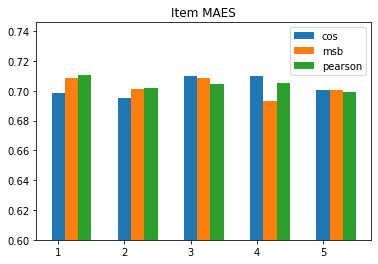

In [85]:
import matplotlib.pyplot as plt

#mae
user_cos = [0.73944768, 0.73838254, 0.74484913, 0.75536807, 0.74246925]
item_cos = [0.6988204 , 0.69545135, 0.71000908, 0.71018455, 0.70055667]

user_msb = [0.74099465, 0.74340462, 0.74811884, 0.74059355, 0.74321676]
item_msb = [0.70883125, 0.70155135, 0.70890134, 0.6934002 , 0.70034708]

user_p = [0.74479917, 0.74399889, 0.74371485, 0.74472081, 0.74166987]
item_p = [0.71048085, 0.70217273, 0.70434047, 0.70524943, 0.69939907]

x2 = [1.2, 2.2, 3.2, 4.2, 5.2]
x3 = [1.4, 2.4, 3.4, 4.4, 5.4]
x4 = [1.6, 2.6, 3.6, 4.6, 5.6]

ax = plt.subplot(111)
ax.bar(x, item_cos, width=0.2, label='cos', align='center')
#ax.bar(x2, user_cos, width=0.2, color='b', label='user cos', align='center')
ax.bar(x2, item_msb, width=0.2 , label='msb', align='center')
ax.bar(x3, item_p, width=0.2, label='pearson', align='center')
plt.ylim(.6)
plt.title('Item MAES')
plt.legend()
plt.show()

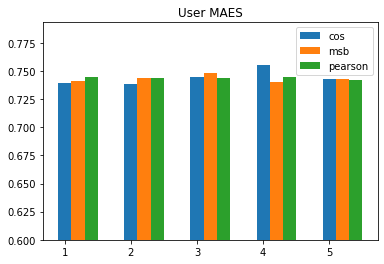

In [86]:
ax = plt.subplot(111)
ax.bar(x, user_cos, width=0.2, label='cos', align='center')
#ax.bar(x2, user_cos, width=0.2, color='b', label='user cos', align='center')
ax.bar(x2, user_msb, width=0.2 , label='msb', align='center')
ax.bar(x3, user_p, width=0.2, label='pearson', align='center')
plt.title('User MAES')
plt.ylim(.6)
plt.legend()
plt.show()

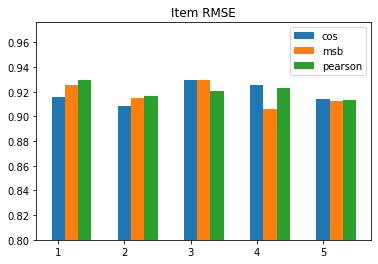

In [92]:
#rmse
user_cos_r = [0.9610227 , 0.96008735, 0.96710626, 0.9850324 , 0.96424183]
item_cos_r = [0.9154518 , 0.90840718, 0.92933666, 0.92574349, 0.91414294]

user_msb_r = [0.96183626, 0.96959795, 0.97533166, 0.96186393, 0.96656878]
item_msb_r = [0.92570377, 0.91513915, 0.92958655, 0.90584538, 0.91243521]

user_p_r = [0.96998178, 0.9718705 , 0.96553551, 0.96817679, 0.96333271]
item_p_r = [0.92971919, 0.91667433, 0.92083316, 0.92266811, 0.91358084]

ax = plt.subplot(111)
ax.bar(x, item_cos_r, width=0.2, label='cos', align='center')
#ax.bar(x2, user_cos, width=0.2, color='b', label='user cos', align='center')
ax.bar(x2, item_msb_r, width=0.2 , label='msb', align='center')
ax.bar(x3, item_p_r, width=0.2, label='pearson', align='center')
plt.ylim(.8)
plt.title('Item RMSE')
plt.legend()
plt.show()

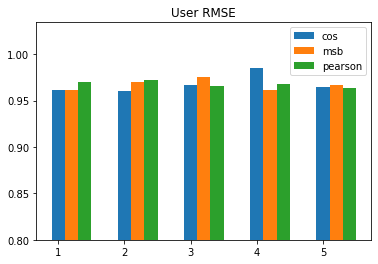

In [91]:
ax = plt.subplot(111)
ax.bar(x, user_cos_r, width=0.2, label='cos', align='center')
#ax.bar(x2, user_cos, width=0.2, color='b', label='user cos', align='center')
ax.bar(x2, user_msb_r, width=0.2 , label='msb', align='center')
ax.bar(x3, user_p_r, width=0.2, label='pearson', align='center')
plt.ylim(.8)
plt.title('User RMSE')
plt.legend()
plt.show()

In [94]:
knnb_k_1 = KNNBasic(k = 1, user_based = True)
knnm_k_1 = KNNWithMeans(k = 1, user_based = False)
knnb_k_5 = KNNBasic(k = 5, user_based = True)
knnm_k_5 = KNNWithMeans(k = 5, user_based = False)
knnb_k_10 = KNNBasic(k = 10, user_based = True)
knnm_k_10 = KNNWithMeans(k = 10, user_based = False)
knnb_k_20 = KNNBasic(k = 20, user_based = True)
knnm_k_20 = KNNWithMeans(k = 20, user_based = False)
knnb_k_40 = KNNBasic(k = 40,user_based = True)
knnm_k_40 = KNNWithMeans(k = 40, user_based = False)
knnb_k_80 = KNNBasic(k = 80, user_based = True)
knnm_k_80 = KNNWithMeans(k = 80, user_based = False)
knnb_k_100 = KNNBasic(k = 100, user_based = True)
knnm_k_100 = KNNWithMeans(k = 100, user_based = False)

In [102]:
utest_1 = cross_validate(knnb_k_1, data, measures=['RMSE', 'MAE'], cv=5)
itest_1 = cross_validate(knnm_k_1, data, measures=['RMSE', 'MAE'], cv=5)
utest_5 = cross_validate(knnb_k_5, data, measures=['RMSE', 'MAE'], cv=5)
itest_5 = cross_validate(knnm_k_5, data, measures=['RMSE', 'MAE'], cv=5)
utest_10 = cross_validate(knnb_k_10, data, measures=['RMSE', 'MAE'], cv=5)
itest_10 = cross_validate(knnm_k_10, data, measures=['RMSE', 'MAE'], cv=5)
utest_20 = cross_validate(knnb_k_20, data, measures=['RMSE', 'MAE'], cv=5)
itest_20 = cross_validate(knnm_k_20, data, measures=['RMSE', 'MAE'], cv=5)
utest_40 = cross_validate(knnb_k_40, data, measures=['RMSE', 'MAE'], cv=5)
itest_40 = cross_validate(knnm_k_40, data, measures=['RMSE', 'MAE'], cv=5)
utest_80 = cross_validate(knnb_k_80, data, measures=['RMSE', 'MAE'], cv=5)
itest_80 = cross_validate(knnm_k_80, data, measures=['RMSE', 'MAE'], cv=5)
utest_100 = cross_validate(knnb_k_100, data, measures=['RMSE', 'MAE'], cv=5)
itest_100 = cross_validate(knnm_k_100, data, measures=['RMSE', 'MAE'], cv=5)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [113]:
print(utest_1)
print(utest_5)
print(utest_10)
print(utest_20)
print(utest_40)
print(utest_80)
print(utest_100)

{'test_rmse': array([1.21019109, 1.19513739, 1.20947479, 1.206929  , 1.21004681]), 'test_mae': array([0.90428397, 0.8922232 , 0.90538288, 0.89944779, 0.903235  ]), 'fit_time': (0.17832565307617188, 0.1870718002319336, 0.168595552444458, 0.1683335304260254, 0.1796112060546875), 'test_time': (1.221724271774292, 1.194214105606079, 1.179882526397705, 1.4585163593292236, 1.1873364448547363)}
{'test_rmse': array([0.99254166, 0.98934098, 0.98037298, 0.98849569, 0.98822635]), 'test_mae': array([0.7610221 , 0.75653968, 0.74875177, 0.75463937, 0.75657597]), 'fit_time': (0.1599116325378418, 0.17387771606445312, 0.1601405143737793, 0.18390607833862305, 0.15816068649291992), 'test_time': (1.473675012588501, 1.5156748294830322, 1.4700465202331543, 1.7722036838531494, 1.5036587715148926)}
{'test_rmse': array([0.96447833, 0.9687774 , 0.9679319 , 0.96310571, 0.96592154]), 'test_mae': array([0.73624393, 0.74300621, 0.74103606, 0.73764502, 0.73985069]), 'fit_time': (0.13851451873779297, 0.186585187911987

In [114]:
print(itest_1)
print(itest_5)
print(itest_10)
print(itest_20)
print(itest_40)
print(itest_80)
print(itest_100)

{'test_rmse': array([1.14704646, 1.15172768, 1.15319944, 1.15028173, 1.1534111 ]), 'test_mae': array([0.88434999, 0.88981834, 0.88813203, 0.88669138, 0.88674842]), 'fit_time': (0.20834875106811523, 0.22248554229736328, 0.20397329330444336, 0.2094736099243164, 0.22320055961608887), 'test_time': (1.2236602306365967, 1.2085161209106445, 1.2027297019958496, 1.5081391334533691, 1.2362401485443115)}
{'test_rmse': array([0.95871941, 0.96041131, 0.95529442, 0.95304636, 0.95484   ]), 'test_mae': array([0.73997885, 0.73874691, 0.73862584, 0.7341036 , 0.73742353]), 'fit_time': (0.19689202308654785, 0.21710443496704102, 0.21297383308410645, 0.2196812629699707, 0.20304131507873535), 'test_time': (1.5686981678009033, 1.867501974105835, 1.5445444583892822, 1.5388379096984863, 1.8711154460906982)}
{'test_rmse': array([0.93427423, 0.91955809, 0.93001437, 0.9431429 , 0.92942136]), 'test_mae': array([0.71591177, 0.70790863, 0.71552568, 0.72429677, 0.71646679]), 'fit_time': (0.17920470237731934, 0.2241969

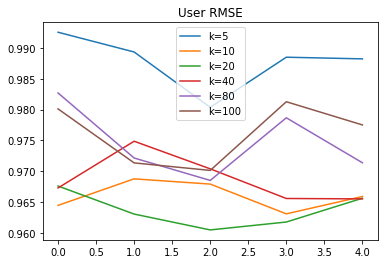

In [111]:
plt.plot([0.99254166, 0.98934098, 0.98037298, 0.98849569, 0.98822635], label="k=5")
plt.plot([0.96447833, 0.9687774 , 0.9679319 , 0.96310571, 0.96592154], label="k=10")
plt.plot([0.96761348, 0.9630693 , 0.96050176, 0.96178081, 0.96563708], label="k=20")
plt.plot([0.96730319, 0.97487525, 0.97040063, 0.96559652, 0.96552942], label="k=40")
plt.plot([0.98270289, 0.97215723, 0.96852365, 0.97867491, 0.97138665], label="k=80")
plt.plot([0.98011833, 0.97136382, 0.970147  , 0.98127785, 0.97751876], label="k=100")
plt.title('User RMSE')
plt.legend()
plt.show()

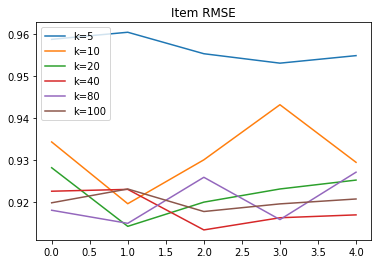

In [115]:
plt.plot([0.95871941, 0.96041131, 0.95529442, 0.95304636, 0.95484   ], label="k=5")
plt.plot([0.93427423, 0.91955809, 0.93001437, 0.9431429 , 0.92942136], label="k=10")
plt.plot([0.92812987, 0.91416661, 0.91993214, 0.92306906, 0.92518603], label="k=20")
plt.plot([0.92253555, 0.92297329, 0.91331533, 0.91621333, 0.91689885], label="k=40")
plt.plot([0.91800056, 0.91488206, 0.92585588, 0.91577417, 0.92706797], label="k=80")
plt.plot([0.9197773 , 0.92306749, 0.917699  , 0.91951776, 0.92068505], label="k=100")
plt.title('Item RMSE')
plt.legend()
plt.show()

In [ ]:
plt.plot([0.95871941, 0.96041131, 0.95529442, 0.95304636, 0.95484   ], label="k=5")
plt.plot([0.93427423, 0.91955809, 0.93001437, 0.9431429 , 0.92942136], label="k=10")
plt.plot([0.92812987, 0.91416661, 0.91993214, 0.92306906, 0.92518603], label="k=20")
plt.plot([0.92253555, 0.92297329, 0.91331533, 0.91621333, 0.91689885], label="k=40")
plt.plot([0.91800056, 0.91488206, 0.92585588, 0.91577417, 0.92706797], label="k=80")
plt.plot([0.9197773 , 0.92306749, 0.917699  , 0.91951776, 0.92068505], label="k=100")
plt.title('Item RMSE')
plt.legend()
plt.show()

In [119]:
for i in range(15, 30):
  temp = KNNBasic(k = i, user_based = True)
  error = cross_validate(temp, data, measures=['RMSE'], cv=5)
  print("%s : %s" % (i, error))


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
15 : {'test_rmse': array([0.95919415, 0.960789  , 0.96724573, 0.96114278, 0.96093241]), 'fit_time': (0.16266608238220215, 0.1863565444946289, 0.16880249977111816, 0.16897296905517578, 0.1844325065612793), 'test_time': (1.89090895652771, 1.833317756652832, 2.381690502166748, 1.7981014251708984, 1.8404262065887451)}
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarit

In [120]:
for i in range(35, 45):
  temp = KNNWithMeans(k = i, user_based = False)
  error = cross_validate(temp, data, measures=['RMSE'], cv=5)
  print("%s : %s" % (i, error))

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
35 : {'test_rmse': array([0.92892621, 0.91782787, 0.9069188 , 0.91971179, 0.92443738]), 'fit_time': (0.19601821899414062, 0.2458477020263672, 0.24523210525512695, 0.2048933506011963, 0.21949243545532227), 'test_time': (2.3989384174346924, 2.3938705921173096, 2.364163398742676, 2.9021172523498535, 2.382936954498291)}
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similar